In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
matplotlib.style.use('ggplot')
%matplotlib inline 



In [43]:
answers = pd.read_csv('/Users/varshapullabhotla/Documents/Capstone_project/stack_data/Answers.csv')


In [3]:
answers.info()
answers.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
Id              int64
OwnerUserId     float64
CreationDate    object
ParentId        int64
Score           int64
Body            object
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [4]:
answers.describe()

/Users/varshapullabhotla/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,OwnerUserId,ParentId,Score
count,2.014516e+06,2.001316e+06,2.014516e+06,2.014516e+06
mean,1.915490e+07,1.487613e+06,1.808390e+07,2.480563e+00
std,1.168713e+07,1.549051e+06,1.169152e+07,1.590938e+01
min,9.200000e+01,1.000000e+00,8.000000e+01,-4.200000e+01
25%,8.854490e+06,NaN,7.692900e+06,0.000000e+00
50%,1.866246e+07,NaN,1.712404e+07,1.000000e+00
75%,2.929756e+07,NaN,2.804977e+07,2.000000e+00
max,4.014339e+07,7.045028e+06,4.014319e+07,5.718000e+03


In [ ]:
answers

In [44]:
questions = pd.read_csv('/Users/varshapullabhotla/Documents/Capstone_project/stack_data/Questions.csv')

In [7]:
questions.info()
questions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1264216 non-null int64
OwnerUserId     1249762 non-null float64
CreationDate    1264216 non-null object
ClosedDate      55959 non-null object
Score           1264216 non-null int64
Title           1264216 non-null object
Body            1264216 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [45]:
questions.CreationDate.unique()

array(['2008-08-01T13:57:07Z', '2008-08-01T14:41:24Z',
       '2008-08-01T15:50:08Z', ..., '2016-10-19T23:52:50Z',
       '2016-10-19T23:55:24Z', '2016-10-19T23:57:31Z'], dtype=object)

In [9]:
answers.CreationDate.unique()

array(['2008-08-01T14:45:37Z', '2008-08-01T16:09:47Z',
       '2008-08-01T19:36:46Z', ..., '2016-10-19T23:52:08Z',
       '2016-10-19T23:54:02Z', '2016-10-19T23:58:58Z'], dtype=object)

In [10]:
tags = pd.read_csv('/Users/varshapullabhotla/Documents/Capstone_project/stack_data/Tags.csv')

In [11]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
clean timestamp
clean body
creation date vs closed date
creation date trend
join questions and answers and tags and see the distribution
understand matrix - input and output
scores vs tag
scores distribution

In [46]:
#Cleaning the Creation Date in both Questions & Answers

answers['CreationDate'] = answers['CreationDate'].apply(lambda x: x.replace("T"," "))
answers['CreationDate'] = answers['CreationDate'].apply(lambda x: x.replace("Z"," "))


In [47]:
answers.CreationDate.head()

0    2008-08-01 14:45:37 
1    2008-08-01 16:09:47 
2    2008-08-01 19:36:46 
3    2008-08-01 23:49:57 
4    2008-08-02 01:49:46 
Name: CreationDate, dtype: object

In [48]:
questions['CreationDate'] = questions['CreationDate'].apply(lambda x: x.replace("T"," "))
questions['CreationDate'] = questions['CreationDate'].apply(lambda x: x.replace("Z"," "))


In [49]:
questions.CreationDate.head()

0    2008-08-01 13:57:07 
1    2008-08-01 14:41:24 
2    2008-08-01 15:50:08 
3    2008-08-01 18:42:19 
4    2008-08-01 23:22:08 
Name: CreationDate, dtype: object

In [ ]:
#Extracting month and date from CreationDate questions and answers

In [ ]:
def year_categorizer(x):
    
    if re.search('2008',x):
        return 2008
    elif re.search('2009',x):
        return 2009
    elif re.search('2010',x):
        return 2010
    elif re.search('2011',x):
        return 2011
    elif re.search('2012',x):
        return 2012
    elif re.search('2013',x):
        return 2013
    elif re.search('2014',x):
        return 2014
    elif re.search('2015',x):
        return 2015
    elif re.search('2016',x):
        return 2016
    else:
        return None

In [21]:
#answers['CreationDate'] = pd.to_datetime(answers['CreationDate'],infer_datetime_format=True)

In [26]:
#questions['CreationDate'] = pd.to_datetime(questions['CreationDate'],infer_datetime_format=True)

In [50]:
qa = pd.merge(questions,answers,left_on='Id',right_on='ParentId')

In [51]:
qa.info()
qa.rename(columns={'Id_x':'QId','CreationDate_x':'Q_CreationDate','Score_x':'Q_score','Body_x':'Q_body','Id_y':'AId',
                  'OwnerUserId_y':'A_ownerUserId','CreationDate_y':'A_CreationDate','Score_y':'A_score','Body_y':'A_body',
                  },inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 13 columns):
Id_x              int64
OwnerUserId_x     float64
CreationDate_x    object
ClosedDate        object
Score_x           int64
Title             object
Body_x            object
Id_y              int64
OwnerUserId_y     float64
CreationDate_y    object
ParentId          int64
Score_y           int64
Body_y            object
dtypes: float64(2), int64(5), object(6)
memory usage: 215.2+ MB


In [62]:
qa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 16 columns):
QId               int64
OwnerUserId_x     float64
Q_CreationDate    object
ClosedDate        object
Q_score           int64
Title             object
Q_body            object
AId               int64
A_ownerUserId     float64
A_CreationDate    object
ParentId          int64
A_score           int64
A_body            object
year              int64
A_year            int64
Q_year            int64
dtypes: float64(2), int64(8), object(6)
memory usage: 261.3+ MB


In [59]:
qa['Q_year'] = qa.Q_CreationDate.apply(year_categorizer)

In [56]:
qa['A_year'] = qa.A_CreationDate.apply(year_categorizer)

In [57]:
#Check for missing values
qa.isnull().sum()

QId                     0
OwnerUserId_x       31893
Q_CreationDate          0
ClosedDate        1915448
Q_score                 0
Title                   0
Q_body                  0
AId                     0
A_ownerUserId       13200
A_CreationDate          0
ParentId                0
A_score                 0
A_body                  0
year                    0
A_year                  0
dtype: int64

In [63]:
qa.head()
qa.drop('year',axis=1,inplace=True)

In [40]:
qa['Q_CreationDate'] = pd.to_numeric(qa['Q_CreationDate'],infer_datetime_format=True)

In [ ]:
qa['A_CreationDate'] = pd.to_numeric(qa['A_CreationDate'],infer_datetime_format=True)

In [68]:
#how many answers were asked per year
qa.groupby(['Q_year'])['QId'].count().sort_values(ascending=False)

Q_year
2013    331653
2014    308177
2012    295453
2015    293510
2011    247887
2016    224221
2010    170207
2009    113117
2008     30291
Name: QId, dtype: int64

In [69]:
# of Answers per year 
qa.groupby(['A_year'])['AId'].count().sort_values(ascending=False)

A_year
2013    334227
2014    323522
2015    319534
2012    285791
2016    256741
2011    228914
2010    148431
2009     95747
2008     21609
Name: AId, dtype: int64

In [ ]:
#How many questions had answers which were not answered in the year it was asked


In [81]:
# Distribution of closed questions over the years
closed = qa[qa['ClosedDate'].notnull()]

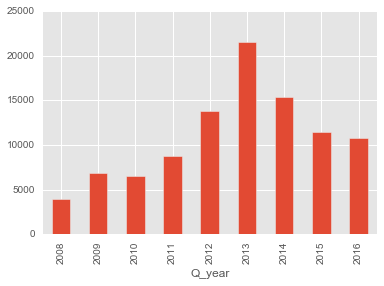

In [96]:
closed.groupby(['Q_year'])['ClosedDate'].count().plot(kind='bar')

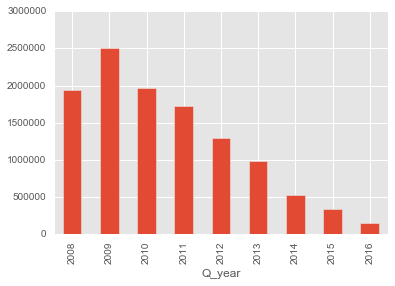

In [101]:
#Score distribution
qa.groupby(['Q_year'])['Q_score'].sum().plot(kind='bar')

In [103]:
qa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 15 columns):
QId               int64
OwnerUserId_x     float64
Q_CreationDate    object
ClosedDate        object
Q_score           int64
Title             object
Q_body            object
AId               int64
A_ownerUserId     float64
A_CreationDate    object
ParentId          int64
A_score           int64
A_body            object
A_year            int64
Q_year            int64
dtypes: float64(2), int64(7), object(6)
memory usage: 245.9+ MB


In [105]:
qa.ClosedDate.head()

0                     NaN
1                     NaN
2                     NaN
3    2012-12-26T03:45:49Z
4    2012-12-26T03:45:49Z
Name: ClosedDate, dtype: object

In [124]:

qa['ClosedDate'] = qa['ClosedDate'].apply(lambda x: x.replace("T"," ") if (pd.notnull(x)) else x )
qa['ClosedDate'] = qa['ClosedDate'].apply(lambda x: x.replace("Z"," ") if(pd.notnull(x)) else x)


In [122]:
qa['ClosedDate'].head()

0                     NaN
1                     NaN
2                     NaN
3    2012-12-26 03:45:49 
4    2012-12-26 03:45:49 
Name: ClosedDate, dtype: object

In [125]:
qa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 15 columns):
QId               int64
OwnerUserId_x     float64
Q_CreationDate    object
ClosedDate        object
Q_score           int64
Title             object
Q_body            object
AId               int64
A_ownerUserId     float64
A_CreationDate    object
ParentId          int64
A_score           int64
A_body            object
A_year            int64
Q_year            int64
dtypes: float64(2), int64(7), object(6)
memory usage: 245.9+ MB


In [136]:
closed2013 = qa[qa['Q_year'] == 2013]

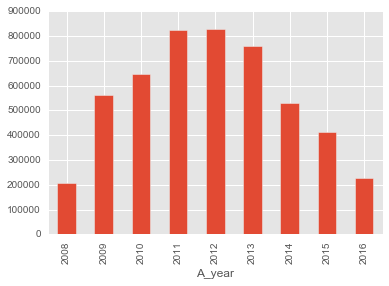

In [139]:
qa.groupby(['A_year'])['A_score'].sum().plot(kind='bar')